<a href="https://colab.research.google.com/github/Kggzzz/KKU_data_mining/blob/master/Pandas101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas

In [2]:
from google.colab import drive 
drive.mount('/content/drive')

path = '/content/drive/My Drive/DWDM_material'

Mounted at /content/drive


In [4]:
import os 

In [5]:
search_click = os.path.join(path,'search_click.csv')
w_restaurant = os.path.join(path,'w_restaurant.csv')

Than use pandas to load the data into the environmaent

In [6]:
search_click_df = pandas.read_csv(search_click)

In [7]:
search_click_df.head()

,click_timestamp,search_id,business_id,display_position,time_diff_nanos,ads
0,11:38.9,5c004472-5ecc-4159-9698-9f329b8e26e1,298839.0,0,2.222400e+15,True
1,30:51.3,5f34eca0-c04e-4c10-b600-54aa447dbd8e,171372.0,0,4.608380e+14,True
2,32:09.6,8dc6d1f0-11f1-4239-9dd2-5c1674c81224,16157.0,0,2.581490e+15,True
3,00:59.8,1a5810e9-3d1f-44b9-9a2e-26ede21c524b,89741.0,1,1.404580e+15,True
4,23:36.8,6bc75e0d-fc65-471e-9926-ff6be6708639,189564.0,1,9.333590e+14,True


In [8]:
w_restaurant_df =  pandas.read_csv(w_restaurant)

In [9]:
w_restaurant_df.head()

,id,name,domain_id,closed,city_name,zipcode,geohash,new_open,weighted_average_rating,number_of_chains,number_of_bookmarks,number_of_reviews,number_of_product_tags,total_number_of_views,number_of_checkins,number_of_menu_groups,number_of_menu_photos,category_name,price_range,avg_price,parking,credit_card_accepted,good_for_groups,good_for_kids,bookable,best_of_wongnai,wifi,number_of_seats,music_venue,hotel_restaurant,pet_friendly,delivery
0,2,นครินทร์ทันตกรรม,2,0,Samut Songkhram,75000,w4rh7g3,0,5.000000,NaN,NaN,1,0,3016,0,0,0,Orthodontic,NaN,NaN,3.0,0.0,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN
1,4,Corner House,1,0,Bangkok Metropolitan Region,12150,w4rx73h,0,2.000000,NaN,NaN,1,0,321,0,0,1,Quick Meal,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5,วัดโลกยสุธาราม,4,0,Phra Nakhon Si Ayutthaya,13000,w4x98jk,0,4.000000,NaN,1.0,0,0,167,0,0,0,Historical/Religion,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6,นันท์คาราโอเกะ,1,0,Bangkok Metropolitan Region,10700,w4rqw9q,0,0.000000,NaN,NaN,0,0,901,0,0,0,Karaoke,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7,Buono Caffe,1,0,Bangkok Metropolitan Region,10220,w4rx4gd,0,3.738462,NaN,15.0,3,0,2360,1,0,2,Café/Coffee Shop,1.0,NaN,1.0,0.0,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN


To check if the dimension of loaded data is correct as described in the description 

การบอกข้อมูลว่ามีcorrect กี่จุด Attributeมีกี่ตัว 

In [10]:
search_click_df.shape

(1048575, 6)

In [11]:
w_restaurant_df.shape

(246847, 32)

It seem everything is ok, let's have fun with data

## 0. point to data in the table

In [12]:
search_click_df['search_id']

0          5c004472-5ecc-4159-9698-9f329b8e26e1
1          5f34eca0-c04e-4c10-b600-54aa447dbd8e
2          8dc6d1f0-11f1-4239-9dd2-5c1674c81224
3          1a5810e9-3d1f-44b9-9a2e-26ede21c524b
4          6bc75e0d-fc65-471e-9926-ff6be6708639
                           ...                 
1048570    99aab616-6fc5-4fbf-994b-4aebee7bb360
1048571    d70a2c5d-ee94-4e4c-9f7c-c5faac6db12a
1048572    4c1de7fe-300e-41aa-9d01-914344fc3753
1048573    2ec0ddec-e450-4b98-9779-42b77aa7eda5
1048574    5741d9cf-b9f1-441d-aa83-d2b0179bf874
Name: search_id, Length: 1048575, dtype: object

In [13]:
search_click_df['search_id'][0]

'5c004472-5ecc-4159-9698-9f329b8e26e1'

ถ้าต้องการแค่บางส่วนของตาราง เช่น ตาราง restaurant ต้องการแค่ name city_name  weighted_average_rating โดยการเรียกต้องใส่เครื่องหมาย list [..] ไว้ 

In [14]:
w_restaurant_df[['name','city_name','weighted_average_rating']]

,name,city_name,weighted_average_rating
0,นครินทร์ทันตกรรม,Samut Songkhram,5.000000
1,Corner House,Bangkok Metropolitan Region,2.000000
2,วัดโลกยสุธาราม,Phra Nakhon Si Ayutthaya,4.000000
3,นันท์คาราโอเกะ,Bangkok Metropolitan Region,0.000000
4,Buono Caffe,Bangkok Metropolitan Region,3.738462
...,...,...,...
246842,Sushi Tama,Bangkok Metropolitan Region,3.663522
246843,สะบายดี คาราโอเกะ,Bangkok Metropolitan Region,0.000000
246844,สเต็กแม่&กาแฟลูก,Bangkok Metropolitan Region,4.000000
246845,Mom Made,Nakhon Si Thammarat,5.000000


## .iloc

การมองตาราง pandas ให้คล้าย nuppy aray โดยใช้ iloc /// การดึงค่าในตาราง 

In [15]:
search_click_df.iloc[0,1]

'5c004472-5ecc-4159-9698-9f329b8e26e1'

In [16]:
search_click_df.iloc[:10,:2]

,click_timestamp,search_id
0,11:38.9,5c004472-5ecc-4159-9698-9f329b8e26e1
1,30:51.3,5f34eca0-c04e-4c10-b600-54aa447dbd8e
2,32:09.6,8dc6d1f0-11f1-4239-9dd2-5c1674c81224
3,00:59.8,1a5810e9-3d1f-44b9-9a2e-26ede21c524b
4,23:36.8,6bc75e0d-fc65-471e-9926-ff6be6708639
5,48:16.7,92ea02ba-2c89-4efd-973c-e23526c531de
6,39:18.4,79d61918-fb3e-4181-99b6-7a7abddfcdb1
7,33:39.0,7f8b2b57-dea1-4fe1-84c8-5a7d63750e47
8,07:48.3,3d9217bb-3eae-42b5-8cf3-a756efae2cfa
9,41:25.4,a2cb0d41-6e1f-4169-9140-cb671fbb41dc


## Missing Values

check ตารางว่า missing มั้ย 
ใช้ isnull เป็นการหาค่า missing ในตารางโดยเช็คทุกๆเซลล์ ถ้าอันไหน missing เป้น true

ส่วน .any เป็นการรวมหรือ or  true ในแต่ะคอลั่ม เพื่อให้ผลน้อยลง 

In [17]:
search_click_df.isnull()

,click_timestamp,search_id,business_id,display_position,time_diff_nanos,ads
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
1048570,False,False,False,False,False,False
1048571,False,False,False,False,False,False
1048572,False,False,False,False,False,False
1048573,False,False,False,False,False,False


In [18]:
search_click_df.isnull().any()

click_timestamp     False
search_id            True
business_id          True
display_position    False
time_diff_nanos     False
ads                 False
dtype: bool

In [19]:
search_click_df.isnull().any().any()

True

## Handling missing values 1

โดยอย่างง่ายที่สุดคือ data ไหนมี missing ก็ให้ลบ missing นั้นออก โดยข้อควรระวังคือข้อมูลที่เรามีจะลดลง dropna

In [20]:
search_click_df_nm = search_click_df.dropna()

In [21]:
search_click_df_nm.isnull().any().any()

False

In [22]:
print(search_click_df.shape)
print(search_click_df_nm.shape)

(1048575, 6)
(1048206, 6)


## Excercise  1 ตรวจสอบว่า การลบข้อมูล missing ออกจากตาราง w_restaurant จะทำข้อมูลลดลงกี่ %

In [23]:
size_before_drop = w_restaurant_df.shape[0]
size_after_drop = w_restaurant_df.dropna().shape[0]
print(f'size before drop = {size_before_drop} size after drop = {size_after_drop}')

size before drop = 246847 size after drop = 4


In [24]:
size_before_drop = w_restaurant_df.shape[0]
size_after_drop = w_restaurant_df.dropna().shape[0]
print(f'size before drop = {size_before_drop} \nsize after drop = {size_after_drop}\nwhich is{100*((size_before_drop-size_after_drop)/size_before_drop)}')

size before drop = 246847 
size after drop = 4
which is99.99837956304918


In [25]:
w_restaurant_df.isnull().any()

id                         False
name                       False
domain_id                  False
closed                     False
city_name                  False
zipcode                     True
geohash                    False
new_open                   False
weighted_average_rating    False
number_of_chains            True
number_of_bookmarks         True
number_of_reviews          False
number_of_product_tags     False
total_number_of_views      False
number_of_checkins         False
number_of_menu_groups      False
number_of_menu_photos      False
category_name              False
price_range                 True
avg_price                   True
parking                     True
credit_card_accepted        True
good_for_groups             True
good_for_kids               True
bookable                    True
best_of_wongnai             True
wifi                        True
number_of_seats             True
music_venue                 True
hotel_restaurant            True
pet_friend

In [26]:
w_restaurant_df.dropna(subset=['id','name','price_range']).shape

(180972, 32)

## Method 2 (raplace with reasonable value)

ค่าที่มาแทนที่

we are replacing missing value in the number of chains with 0

In [27]:
w_restaurant_df[['number_of_chains']] = w_restaurant_df[['number_of_chains']].fillna(0)

In [28]:
w_restaurant_df.isnull().any()

id                         False
name                       False
domain_id                  False
closed                     False
city_name                  False
zipcode                     True
geohash                    False
new_open                   False
weighted_average_rating    False
number_of_chains           False
number_of_bookmarks         True
number_of_reviews          False
number_of_product_tags     False
total_number_of_views      False
number_of_checkins         False
number_of_menu_groups      False
number_of_menu_photos      False
category_name              False
price_range                 True
avg_price                   True
parking                     True
credit_card_accepted        True
good_for_groups             True
good_for_kids               True
bookable                    True
best_of_wongnai             True
wifi                        True
number_of_seats             True
music_venue                 True
hotel_restaurant            True
pet_friend

โดยตัวเลขที่ใส่ใน fillna() จะเป็นค่าของส่วนใหญ่เช่น number_of_chains  ใส่ 0 เพราะร้านอาหารส่วนใหญ่ไม่มีสาขาย่อย หรือ การใช้อายุนศ. เป็น 18 เพราะ ปี1 ที่อายุ18 มีมากกว่าอายุอื่นๆ 


### Method 2 (raplace with unknow value)

## Method 3 





In [29]:
new_table = w_restaurant_df[['name','city_name','avg_price']]
new_table

,name,city_name,avg_price
0,นครินทร์ทันตกรรม,Samut Songkhram,NaN
1,Corner House,Bangkok Metropolitan Region,NaN
2,วัดโลกยสุธาราม,Phra Nakhon Si Ayutthaya,NaN
3,นันท์คาราโอเกะ,Bangkok Metropolitan Region,NaN
4,Buono Caffe,Bangkok Metropolitan Region,NaN
...,...,...,...
246842,Sushi Tama,Bangkok Metropolitan Region,NaN
246843,สะบายดี คาราโอเกะ,Bangkok Metropolitan Region,NaN
246844,สเต็กแม่&กาแฟลูก,Bangkok Metropolitan Region,NaN
246845,Mom Made,Nakhon Si Thammarat,NaN


[PD] select data

In [30]:
new_table['city_name']=='Bangkok Metropolitan Region'

0         False
1          True
2         False
3          True
4          True
          ...  
246842     True
246843     True
246844     True
246845    False
246846    False
Name: city_name, Length: 246847, dtype: bool

ถ้าต้องการเลือก table ที่เราต้องการ จะใส่ list โดย list จะมีความยาวเท่ากับจำนวนข้อมูลของเรา 

In [31]:
selected_list = new_table['city_name']=='Bangkok Metropolitan Region'
selected_list 

0         False
1          True
2         False
3          True
4          True
          ...  
246842     True
246843     True
246844     True
246845    False
246846    False
Name: city_name, Length: 246847, dtype: bool

In [32]:
new_table[selected_list ]

,name,city_name,avg_price
1,Corner House,Bangkok Metropolitan Region,NaN
3,นันท์คาราโอเกะ,Bangkok Metropolitan Region,NaN
4,Buono Caffe,Bangkok Metropolitan Region,NaN
7,Sazanami,Bangkok Metropolitan Region,NaN
10,Rotee Me Chabu,Bangkok Metropolitan Region,NaN
...,...,...,...
246835,ร้านครัวแกงป่า,Bangkok Metropolitan Region,NaN
246840,โตข้าวต้มปลา,Bangkok Metropolitan Region,NaN
246842,Sushi Tama,Bangkok Metropolitan Region,NaN
246843,สะบายดี คาราโอเกะ,Bangkok Metropolitan Region,NaN


##  หาว่าราคาเฉลี่ยของร้านอาหารในกทมเท่ากับกี่บาท

In [33]:
new_table[new_table['city_name']=='Bangkok Metropolitan Region'].dropna()['avg_price']

67         375.0
134        175.0
247       1500.0
319        375.0
382        175.0
           ...  
246458      50.0
246472    1500.0
246508     375.0
246666     375.0
246721     375.0
Name: avg_price, Length: 3001, dtype: float64

เริ่มแรกจะนำตาราง new_table มาเลือก city name ให้เป็นกทม แล้ว dropna หาข้อมูลโดยทำให้ missing หายไป

In [34]:
bkk_table = new_table[new_table['city_name']=='Bangkok Metropolitan Region']
bkk_table.head()

,name,city_name,avg_price
1,Corner House,Bangkok Metropolitan Region,NaN
3,นันท์คาราโอเกะ,Bangkok Metropolitan Region,NaN
4,Buono Caffe,Bangkok Metropolitan Region,NaN
7,Sazanami,Bangkok Metropolitan Region,NaN
10,Rotee Me Chabu,Bangkok Metropolitan Region,NaN


In [35]:
bkk_table_dp = bkk_table.dropna()
bkk_table_dp.head()

,name,city_name,avg_price
67,เล็กกุ้งเผา,Bangkok Metropolitan Region,375.0
134,Cafe Cha,Bangkok Metropolitan Region,175.0
247,Masterpiece clinic,Bangkok Metropolitan Region,1500.0
319,Chaba Nails & Eyelashes Pro,Bangkok Metropolitan Region,375.0
382,Panlee Bakery,Bangkok Metropolitan Region,175.0


จากนั้นหาcoluumที่เราต้องการคือ avg price 

In [36]:
bkk_table_dp_avg_price = bkk_table_dp['avg_price']
bkk_table_dp_avg_price

67         375.0
134        175.0
247       1500.0
319        375.0
382        175.0
           ...  
246458      50.0
246472    1500.0
246508     375.0
246666     375.0
246721     375.0
Name: avg_price, Length: 3001, dtype: float64

จากนั้นนำมาหาค่าเฉลีย

In [37]:
bkk_table_dp_avg_price.mean()

392.5854715094968

แก้ missing ค่าเดิมที่เหมาะสมกับกลุ่มของมัน

In [38]:
bkk_table[['avg_price']] = bkk_table[['avg_price']].fillna(bkk_table_dp_avg_price.mean())
bkk_table.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,name,city_name,avg_price
1,Corner House,Bangkok Metropolitan Region,392.585472
3,นันท์คาราโอเกะ,Bangkok Metropolitan Region,392.585472
4,Buono Caffe,Bangkok Metropolitan Region,392.585472
7,Sazanami,Bangkok Metropolitan Region,392.585472
10,Rotee Me Chabu,Bangkok Metropolitan Region,392.585472


In [39]:
bkk_table[['avg_price']] = bkk_table[['avg_price']].fillna(bkk_table_dp_avg_price.mean(),inplace=True)
bkk_table.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

,name,city_name,avg_price
1,Corner House,Bangkok Metropolitan Region,None
3,นันท์คาราโอเกะ,Bangkok Metropolitan Region,None
4,Buono Caffe,Bangkok Metropolitan Region,None
7,Sazanami,Bangkok Metropolitan Region,None
10,Rotee Me Chabu,Bangkok Metropolitan Region,None


## ## EX9 หาว่าราคาเฉลี่ยของร้านอาหารในเชียงใหม่เท่ากับกี่บาท

In [40]:
new_table[new_table['city_name']=='Chiang Mai'].dropna()

,name,city_name,avg_price
196,Beer Republic,Chiang Mai,175.0
1465,The Riverside Bar & Restaurant @ Chiang Mai,Chiang Mai,375.0
2978,Juice Street Good Belly Cafe,Chiang Mai,50.0
4683,P.P. หมูจุ่ม & กระทะร้อน,Chiang Mai,175.0
4918,The Duke's,Chiang Mai,175.0
...,...,...,...
243517,มนต์นมสด,Chiang Mai,50.0
244433,ก้าวย่างทะเลเผา,Chiang Mai,175.0
244841,ส้มตำปูม้าป้าป่อง,Chiang Mai,50.0
244937,บ้านหมอนอุ่น,Chiang Mai,50.0


In [41]:
new_table[new_table['city_name']=='Chiang Mai'].dropna()['avg_price'].mean()

188.41594827586206

In [42]:
chm_table = new_table[new_table['city_name']=='Chiang Mai']
chm_table.head()

,name,city_name,avg_price
36,Wrap Master,Chiang Mai,NaN
40,Sozen,Chiang Mai,NaN
52,ไวท์ดราก้อน หมูกะทะ,Chiang Mai,NaN
60,เต-ชา ก๋วยเตี๋ยวไข่ไดโนเสาร์,Chiang Mai,NaN
79,ก๋วยเตี๋ยวเรือสะใจ,Chiang Mai,NaN


In [43]:
chm_table_dp = chm_table.dropna()
chm_table_dp.head()

,name,city_name,avg_price
196,Beer Republic,Chiang Mai,175.0
1465,The Riverside Bar & Restaurant @ Chiang Mai,Chiang Mai,375.0
2978,Juice Street Good Belly Cafe,Chiang Mai,50.0
4683,P.P. หมูจุ่ม & กระทะร้อน,Chiang Mai,175.0
4918,The Duke's,Chiang Mai,175.0


In [44]:
chm_table_dp_avg_price = chm_table_dp['avg_price']
chm_table_dp_avg_price

196       175.0
1465      375.0
2978       50.0
4683      175.0
4918      175.0
          ...  
243517     50.0
244433    175.0
244841     50.0
244937     50.0
245954    375.0
Name: avg_price, Length: 464, dtype: float64

In [45]:
chm_table_dp_avg_price.mean()

188.41594827586206

In [46]:
chm_table[['avg_price']] = chm_table[['avg_price']].fillna(chm_table_dp_avg_price.mean())
chm_table.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,name,city_name,avg_price
36,Wrap Master,Chiang Mai,188.415948
40,Sozen,Chiang Mai,188.415948
52,ไวท์ดราก้อน หมูกะทะ,Chiang Mai,188.415948
60,เต-ชา ก๋วยเตี๋ยวไข่ไดโนเสาร์,Chiang Mai,188.415948
79,ก๋วยเตี๋ยวเรือสะใจ,Chiang Mai,188.415948


In [47]:
chm_table[['avg_price']] = chm_table[['avg_price']].fillna(chm_table_dp_avg_price.mean(),inplace=True)
chm_table.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

,name,city_name,avg_price
36,Wrap Master,Chiang Mai,None
40,Sozen,Chiang Mai,None
52,ไวท์ดราก้อน หมูกะทะ,Chiang Mai,None
60,เต-ชา ก๋วยเตี๋ยวไข่ไดโนเสาร์,Chiang Mai,None
79,ก๋วยเตี๋ยวเรือสะใจ,Chiang Mai,None


## [PD] ต่อตารางในแนวแกน Y (เพิ่มจำนวน data) pd.concat

โดยการสร้างตารางย่อยในแต่ละอันแล้วนำมาต่อกัน

In [55]:
chm_table = new_table[new_table['city_name']=='Chiang Mai']
chm_table[['avg_price']] = chm_table[['avg_price']].fillna(new_table[new_table['city_name']=='Chiang Mai'].dropna()['avg_price'].mean())
chm_table.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,name,city_name,avg_price
36,Wrap Master,Chiang Mai,188.415948
40,Sozen,Chiang Mai,188.415948
52,ไวท์ดราก้อน หมูกะทะ,Chiang Mai,188.415948
60,เต-ชา ก๋วยเตี๋ยวไข่ไดโนเสาร์,Chiang Mai,188.415948
79,ก๋วยเตี๋ยวเรือสะใจ,Chiang Mai,188.415948


การรวมตารางที่ส้รางทั้งหมด ใช้ concat 

In [50]:
pd_concat = pandas.concat([bkk_table,chm_table])
pd_concat

,name,city_name,avg_price
1,Corner House,Bangkok Metropolitan Region,NaN
3,นันท์คาราโอเกะ,Bangkok Metropolitan Region,NaN
4,Buono Caffe,Bangkok Metropolitan Region,NaN
7,Sazanami,Bangkok Metropolitan Region,NaN
10,Rotee Me Chabu,Bangkok Metropolitan Region,NaN
...,...,...,...
246783,ส้มตำลำฮิมกอง,Chiang Mai,188.415948
246803,ไก่ทอดปักษ์ใต้ นายหัวโต,Chiang Mai,188.415948
246808,แคลิฟอร์เนียเวร็ป,Chiang Mai,188.415948
246813,TOONGs COFFEE Roasters,Chiang Mai,188.415948


## Method 3 Looping 

### 1 ดึงจังหวัดที่มีอยู่ทั้งหมดในตารางออกมา 

set คือนับตัวซ้ำแล้วเลือกม่ฃาแค่ตัวเดียว 

In [53]:
all_cities = set(new_table['city_name'])
len(all_cities)

479

### 2 จะคำนวณค่า mean ของ column ของ 'city_name' เพื่อเก็บไว้เติมใส่เมืองที่เป็น missing ทุกร้าน

In [54]:
all_mean = new_table.dropna(subset=['avg_price'])['avg_price'].mean()
all_mean

327.44728783902013

###3 สร้าง list ว่างก่อนเพื่อให้ไปวนloopของตารางทุกๆจังหวัด

In [58]:
all_cities_list = []
for each_city in list(all_cities):
      
      # chm_table = new_table[new_table['city_name']=='Chiang Mai']
      # chm_table[['avg_price']] = chm_table[['avg_price']].fillna(new_table[new_table['city_name']=='Chiang Mai'].dropna()['avg_price'].mean())


      temp_table = new_table[new_table['city_name']==each_city].copy()
      temp_table[['avg_price']] =temp_table[['avg_price']].fillna(new_table[new_table['city_name']==each_city].dropna()['avg_price'].mean())
      all_cities_list.append(temp_table)

###4 สร้างตารางจาก list ของตาราง ด้วย pd.concat 

In [59]:
all_no_missing = pandas.concat(all_cities_list)
all_no_missing

,name,city_name,avg_price
266,บ้านสวนคุณยาย,Uthai Thani,NaN
649,ขนมจีนปิ้ง,Uthai Thani,NaN
1436,ครัวครูแดง,Uthai Thani,NaN
2074,ชาบู71,Uthai Thani,NaN
2607,ลูกชิ้นปิ้งเจ๊ศรี,Uthai Thani,NaN
...,...,...,...
202483,Pacific Chinese Restaurant,Greater Manchester,NaN
209325,The John Millington,Greater Manchester,NaN
220589,What A Potato,Greater Manchester,NaN
235602,Middle Kingdom,Greater Manchester,NaN


###5 เติมค่า mean ของทั้งตารางให้กับจังหวัดที่ไม่มี mean

In [60]:
all_no_missing = all_no_missing.fillna(all_mean)
all_no_missing.isnull().any()

name         False
city_name    False
avg_price    False
dtype: bool

#Remove outlier (Boxplot)

## Quiz วาด boxplot ของค่า 'avg_price' ของตาราง all_no_missing (แนวนอน)

In [70]:
from matplotlib import pyplot as plt

{'boxes': [<matplotlib.lines.Line2D at 0x7f00777cd898>],
 'caps': [<matplotlib.lines.Line2D at 0x7f00777652e8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f0077765d68>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f00777659e8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f00777cdba8>,
  <matplotlib.lines.Line2D at 0x7f00777cdf28>]}

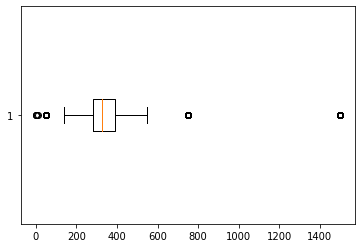

In [71]:
plt.boxplot(all_no_missing['avg_price'],vert = False)